In [1]:
!pip install -U liblinear-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.8 MB/s 
  Created wheel for liblinear-official: filename=liblinear_official-2.45.0-cp37-cp37m-linux_x86_64.whl size=124360 sha256=7be1b77424925e0803b0626c61b616e6925bb937f5dd10f59a99d37e33eecf43
  Stored in directory: /root/.cache/pip/wheels/31/3d/a6/b08f7b173446e099f6c5ab24662604b8c463bc3a1f72464c80
Successfully built liblinear-official


In [2]:
pip install -U libsvm-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for libsvm-official: filename=libsvm_official-3.30.0-cp37-cp37m-linux_x86_64.whl size=101397 sha256=ad5378007082b0a86b5fa9000ad3cb4d29738e68bd73a3c941f0c6948dbfead5
  Stored in directory: /root/.cache/pip/wheels/7a/bc/ea/af1d905b704a64fb88c9be94e00fc3d777243734e1f181ef1d
Successfully built libsvm-official


In [1]:
from liblinear.liblinearutil import *
from libsvm.svmutil import *

In [2]:
# load the data and label
y,x = svm_read_problem('covtype.libsvm.binary',return_scipy = True)

In [3]:
# Pre-proprocess the data by subtracting mean and scale them in [-1,1].
scale_param = csr_find_scale_param(x,lower = -1,upper = 1)
x = csr_scale(x, scale_param)

If feature values are non-negative and sparse, set lower=0 rather than the default lower=-1.
       > new      #nonzeros 31363368
If feature values are non-negative and sparse, get scale_param by setting lower=0 rather than the default lower=-1.


In [4]:
import datetime

In [18]:
# Apply SVM(dual)
# L2-regularized L2-loss support vector classification (dual)
# adjust the parameters

starttime = datetime.datetime.now() # record start time now

prob = problem(y[:100000],x[:100000])
param = parameter('-s 1 -c 5 -q')
m = train(prob, param)
p_labels,p_acc,p_vals = predict(y[-10000:],x[-10000:],m)

endtime = datetime.datetime.now() # record end time here
print (endtime - starttime)

Accuracy = 84.18% (8418/10000) (classification)
0:00:21.900524


In [5]:
# Apply SVM(primal)
# L2-regularized L2-loss support vector classification (primal)
# adjust the parameters

starttime2 = datetime.datetime.now() 

prob2 = problem(y[:-100000],x[:-100000]) # make the trainset
param2 = parameter('-s 2 -c 5 -q')
m2 = train(prob2, param2)
p_labels,p_acc,p_vals = predict(y[-10000:],x[-10000:],m2) # predict the testset

endtime2 = datetime.datetime.now()
print (endtime2 - starttime2)

Accuracy = 45.42% (4542/10000) (classification)
0:00:10.435059


In [ ]:
# Use Libsvm, apply kernel methods
from libsvm.svmutil import *
m = svm_train(y[:10000], x[:10000])
p_label,p_acc,p_val=svm_predict(y[-1000:],x[-1000:],m) 

In [5]:
# reduce the dimensionality by using PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import numpy as np

X_std = StandardScaler().fit_transform(x[:100].toarray()) # sample 100 points
X_pca = PCA(n_components=2).fit_transform(X_std) # decompose it into 2 dimensionality

#predict_std = StandardScaler().fit_transform(p_val[:100])


In [ ]:
# this block is for plotting
# contains points with different label in different list
x_pos = []
y_pos = []

x_pos2 = []
y_pos2 = []

for i in range(100):
  if y[i] == 1:
    x_pos.append(X_pca[i][0])
    y_pos.append(X_pca[i][1])
  else:
    x_pos2.append(X_pca[i][0])
    y_pos2.append(X_pca[i][1])

In [ ]:
# w = model.SVs' * model.sv_coef;
# b = -model.rho;
# get from libsvm FAQ: https://www.csie.ntu.edu.tw/~cjlin/libsvm/faq.html#f804

w = 0.0 # initialize the w
m_SV = PCA(n_components=1).fit_transform(X_std) # get one D of SV

for i in range(len(m_SV)):
  w += m_SV[i] * m.get_sv_coef()[i] # mutiply SV with its sv_coef

b = m.rho[0] # get the intercept here

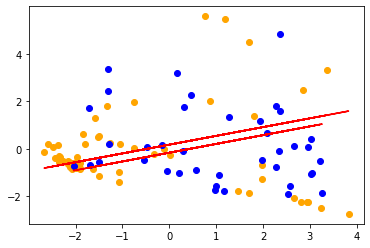

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_pos, y_pos,c="orange")
plt.scatter(x_pos2, y_pos2,c="blue")

arr = np.array(x_pos)
support_vector = w * arr + b # support vector 1
b = -b
arr2 = np.array(x_pos2)
support_vector2 = w* arr2 + b # second support vector

plt.plot(arr, support_vector, c='red')
plt.plot(arr2, support_vector2, c='red')
plt.show()

In [8]:
# Apply SVM(dual)
# L2-regularized L2-loss support vector classification (dual)
# adjust the parameters

X_std = StandardScaler().fit_transform(x.toarray()) 
X_pca = PCA(n_components=2).fit_transform(X_std) # decompose it into 2 dimensionality

prob = problem(y[:-100000],X_std[:-100000])
param = parameter('-s 1 -c 5 -q')
m = train(prob2, param)
p_labels,p_acc,p_vals = predict(y[-10000:],X_std[-10000:],m)

Accuracy = 46.92% (4692/10000) (classification)


In [7]:
# Apply SVM(primal)
# L2-regularized L2-loss support vector classification (primal)
# adjust the parameters



prob2 = problem(y[:-100000],X_std[:-100000]) # make the trainset
param2 = parameter('-s 2 -c 5 -q')
m2 = train(prob2, param2)
p_labels,p_acc,p_vals = predict(y[-10000:],X_std[-10000:],m2) # predict the testset



Accuracy = 46.9% (4690/10000) (classification)
